In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('/content/cirrhosis.csv')
df
len(df)

418

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             418 non-null    int64  
 1   N_Days         418 non-null    int64  
 2   Status         418 non-null    object 
 3   Drug           312 non-null    object 
 4   Age            418 non-null    int64  
 5   Sex            418 non-null    object 
 6   Ascites        312 non-null    object 
 7   Hepatomegaly   312 non-null    object 
 8   Spiders        312 non-null    object 
 9   Edema          418 non-null    object 
 10  Bilirubin      418 non-null    float64
 11  Cholesterol    284 non-null    float64
 12  Albumin        418 non-null    float64
 13  Copper         310 non-null    float64
 14  Alk_Phos       312 non-null    float64
 15  SGOT           312 non-null    float64
 16  Tryglicerides  282 non-null    float64
 17  Platelets      407 non-null    float64
 18  Prothrombi

In [ ]:
df.describe().transpose().style.background_gradient(cmap = 'copper_r')

,count,mean,std,min,25%,50%,75%,max
ID,418.000000,209.500000,120.810458,1.000000,105.250000,209.500000,313.750000,418.000000
N_Days,418.000000,1917.782297,1104.672992,41.000000,1092.750000,1730.000000,2613.500000,4795.000000
Age,418.000000,18533.351675,3815.845055,9598.000000,15644.500000,18628.000000,21272.500000,28650.000000
Bilirubin,418.000000,3.220813,4.407506,0.300000,0.800000,1.400000,3.400000,28.000000
Cholesterol,284.000000,369.510563,231.944545,120.000000,249.500000,309.500000,400.000000,1775.000000
Albumin,418.000000,3.497440,0.424972,1.960000,3.242500,3.530000,3.770000,4.640000
Copper,310.000000,97.648387,85.613920,4.000000,41.250000,73.000000,123.000000,588.000000
Alk_Phos,312.000000,1982.655769,2140.388824,289.000000,871.500000,1259.000000,1980.000000,13862.400000
SGOT,312.000000,122.556346,56.699525,26.350000,80.600000,114.700000,151.900000,457.250000
Tryglicerides,282.000000,124.702128,65.148639,33.000000,84.250000,108.000000,151.000000,598.000000


**Handling missing values**

In [ ]:
df.isna().sum().transpose()

ID                 0
N_Days             0
Status             0
Drug             106
Age                0
Sex                0
Ascites          106
Hepatomegaly     106
Spiders          106
Edema              0
Bilirubin          0
Cholesterol      134
Albumin            0
Copper           108
Alk_Phos         106
SGOT             106
Tryglicerides    136
Platelets         11
Prothrombin        2
Stage              6
dtype: int64

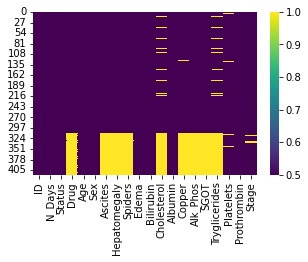

In [ ]:
plt.figure(figsize=(5,3))
sns.heatmap(df.isnull(),cmap='viridis',vmin=0.5, vmax=1)

In [ ]:
df=df.dropna(subset=['Stage'])
len(df)

412

In [ ]:
df.select_dtypes(include=(['int64','float64'])).isna().sum()

ID                 0
N_Days             0
Age                0
Bilirubin          0
Cholesterol      128
Albumin            0
Copper           102
Alk_Phos         100
SGOT             100
Tryglicerides    130
Platelets         11
Prothrombin        2
Stage              0
dtype: int64

In [ ]:
df.select_dtypes(include=(['object'])).isna().sum()

Status            0
Drug            100
Sex               0
Ascites         100
Hepatomegaly    100
Spiders         100
Edema             0
dtype: int64

In [ ]:
cnt_null=0
length_df=0
for col in df.columns:
  null=0
  l=0
  null = df[col].isnull().sum()
  l=len(df[col])
  cnt_null=cnt_null+null
  length_df=length_df+l

percent=np.ceil(100*cnt_null/length_df)
print("percent of missing values",percent)

percent of missing values 12.0


In [ ]:
df_mv=pd.DataFrame({'percentage': round((df.isnull().mean())*100,4)})
df_mv.sort_values(by='percentage',ascending= False).style.background_gradient(cmap='summer')
# //instead of mean check is median would work or suit well

,percentage
Tryglicerides,31.553400
Cholesterol,31.068000
Copper,24.757300
Drug,24.271800
Ascites,24.271800
Hepatomegaly,24.271800
Spiders,24.271800
SGOT,24.271800
Alk_Phos,24.271800
Platelets,2.669900


In [ ]:
categrical_col=df.select_dtypes(["object"]).columns
numerical_col=df.select_dtypes(["float64","int64"]).columns

In [ ]:
for j in categrical_col:
  df[j].fillna(df[j].mode().values[0],inplace=True)

for i in numerical_col:
  df[i].fillna(df[i].median(),inplace=True)

df.isnull().sum()

ID               0
N_Days           0
Status           0
Drug             0
Age              0
Sex              0
Ascites          0
Hepatomegaly     0
Spiders          0
Edema            0
Bilirubin        0
Cholesterol      0
Albumin          0
Copper           0
Alk_Phos         0
SGOT             0
Tryglicerides    0
Platelets        0
Prothrombin      0
Stage            0
dtype: int64

In [ ]:
# df.drop(df[df['Stage'].isnull()].index,inplace=True)
# already done

In [ ]:
df.shape

(412, 20)

In [ ]:
df.duplicated().value_counts()
#no duplicates are there

False    412
dtype: int64

In [ ]:
df.describe(include='object')

,Status,Drug,Sex,Ascites,Hepatomegaly,Spiders,Edema
count,412,412,412,412,412,412,412
unique,3,2,2,2,2,2,3
top,C,D-penicillamine,F,N,Y,N,N
freq,230,258,368,388,260,322,348


In [ ]:
df.describe(include='int64').style.background_gradient(cmap='viridis')

,ID,N_Days,Age
count,412.000000,412.000000,412.000000
mean,207.837379,1916.837379,18498.286408
std,120.888581,1099.941147,3823.705746
min,1.000000,41.000000,9598.000000
25%,103.750000,1094.250000,15609.250000
50%,206.500000,1713.500000,18628.000000
75%,309.250000,2610.500000,21200.500000
max,418.000000,4795.000000,28650.000000


In [ ]:
df.describe(include='float64').style.background_gradient(cmap='viridis')

,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
count,412.000000,412.000000,412.000000,412.000000,412.000000,412.000000,412.000000,412.000000,412.000000,412.000000
mean,3.227670,350.866505,3.500073,91.546117,1807.011165,120.649466,119.432039,255.912621,10.732767,3.024272
std,4.429421,194.465151,0.423948,74.994211,1887.615128,49.436930,54.426519,94.467529,1.024098,0.882042
min,0.300000,120.000000,1.960000,4.000000,289.000000,26.350000,33.000000,62.000000,9.000000,1.000000
25%,0.800000,270.500000,3.247500,51.000000,1009.000000,90.725000,94.000000,190.000000,10.000000,2.000000
50%,1.400000,309.500000,3.530000,73.000000,1259.000000,114.700000,108.000000,249.000000,10.600000,3.000000
75%,3.400000,350.750000,3.782500,102.000000,1716.500000,136.485000,128.500000,314.500000,11.100000,4.000000
max,28.000000,1775.000000,4.640000,588.000000,13862.400000,457.250000,598.000000,563.000000,18.000000,4.000000


we can convert the stage data into either 0 or 1 if it is in stage 1,2,3 it is convertible and else it is non-convertible i.e., 1.

In [ ]:
df

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,D,D-penicillamine,21464,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,2,4500,C,D-penicillamine,20617,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,3,1012,D,D-penicillamine,25594,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,4,1925,D,D-penicillamine,19994,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,5,1504,CL,Placebo,13918,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,414,681,D,D-penicillamine,24472,F,N,Y,N,N,1.2,309.5,2.96,73.0,1259.0,114.70,108.0,174.0,10.9,3.0
414,415,1103,C,D-penicillamine,14245,F,N,Y,N,N,0.9,309.5,3.83,73.0,1259.0,114.70,108.0,180.0,11.2,4.0
415,416,1055,C,D-penicillamine,20819,F,N,Y,N,N,1.6,309.5,3.42,73.0,1259.0,114.70,108.0,143.0,9.9,3.0
416,417,691,C,D-penicillamine,21185,F,N,Y,N,N,0.8,309.5,3.75,73.0,1259.0,114.70,108.0,269.0,10.4,3.0


In [ ]:
# df.loc[df['Stage'].isin([1,2,3]),'Stage']=0
# df.loc[df['Stage'].isin([4]),'Stage']=1

In [ ]:
df.loc[df['Drug'].isna(),'Drug']="No Drug"

age from days to years

In [ ]:
df["Age"]=(df["Age"]/365).astype("int64")
df["Age"]

0      58
1      56
2      70
3      54
4      38
       ..
413    67
414    39
415    57
416    58
417    53
Name: Age, Length: 412, dtype: int64

In [ ]:
df["Stage"].value_counts()

3.0    155
4.0    144
2.0     92
1.0     21
Name: Stage, dtype: int64

In [ ]:
df["Age"].value_counts()

52    23
56    19
48    17
44    16
51    15
41    15
46    15
62    14
49    13
54    13
55    13
53    13
58    11
61    11
50    11
40    11
42    11
38    11
67    10
35    10
33    10
43     9
47     9
45     9
63     8
59     8
36     7
64     7
37     7
57     6
70     6
34     6
60     6
66     5
32     5
69     5
39     5
65     4
68     3
30     3
31     2
75     2
74     1
72     1
78     1
28     1
29     1
71     1
76     1
26     1
Name: Age, dtype: int64

Text(0.5, 1.0, 'Age')

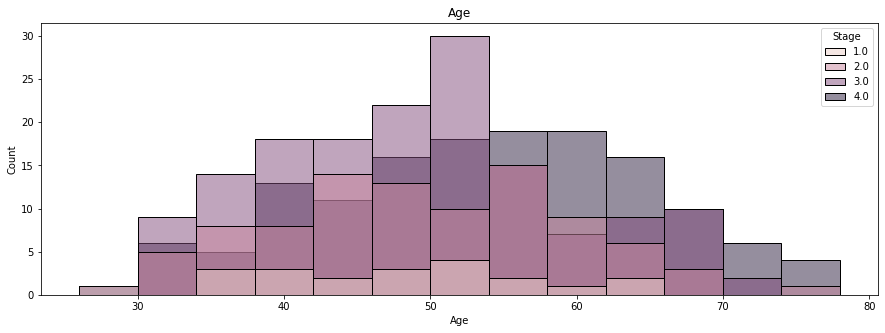

In [ ]:
# age group konsi stage walo mai jyada hai
plt.figure(figsize=(15,5))
sns.histplot(x="Age", data=df, hue="Stage")
plt.title("Age",fontsize=12)

Text(0.5, 1.0, 'Drug')

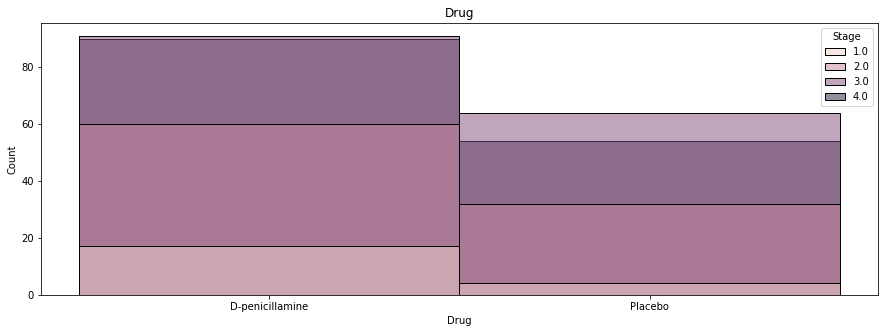

In [ ]:
# drug in which stage
plt.figure(figsize=(15,5))
sns.histplot(x="Drug", data =df, hue="Stage")
plt.title("Drug", fontsize=12)

In [ ]:
df["Status"].value_counts()

C     230
D     157
CL     25
Name: Status, dtype: int64

Text(0.5, 1.0, 'Status')

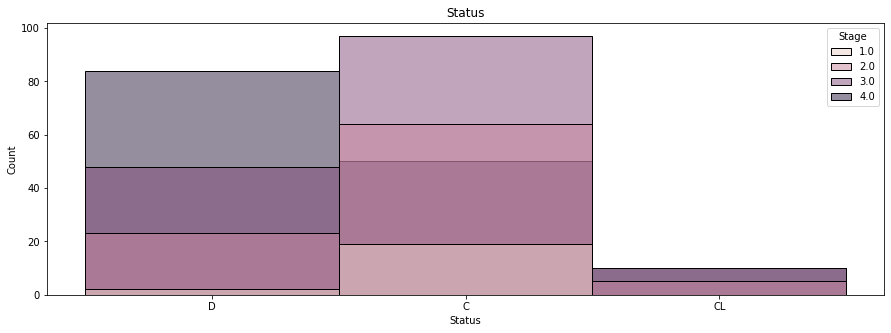

In [ ]:
plt.figure(figsize=(15,5))
sns.histplot(x="Status", data=df, hue="Stage")
plt.title("Status", fontsize=12)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


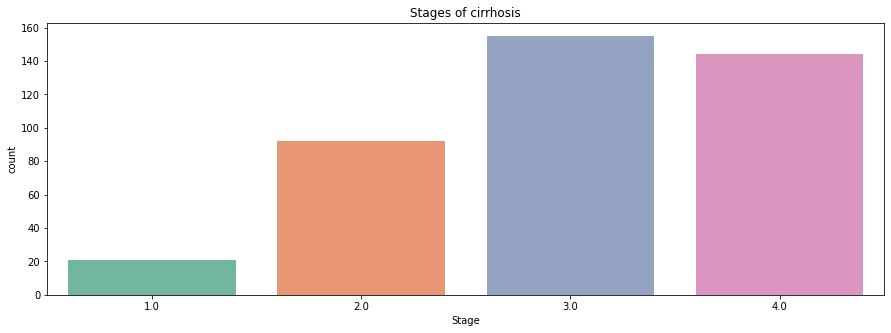

In [ ]:
plt.figure(figsize=(15,5))
sns.countplot(df["Stage"],palette="Set2")
plt.title("Stages of cirrhosis",fontsize=12)
plt.show()

In [ ]:
df["N_Days"].value_counts()

2563    2
597     2
1434    2
1614    2
1363    2
       ..
3098    1
3150    1
3149    1
2796    1
976     1
Name: N_Days, Length: 394, dtype: int64

Text(0.5, 1.0, 'N_Days')

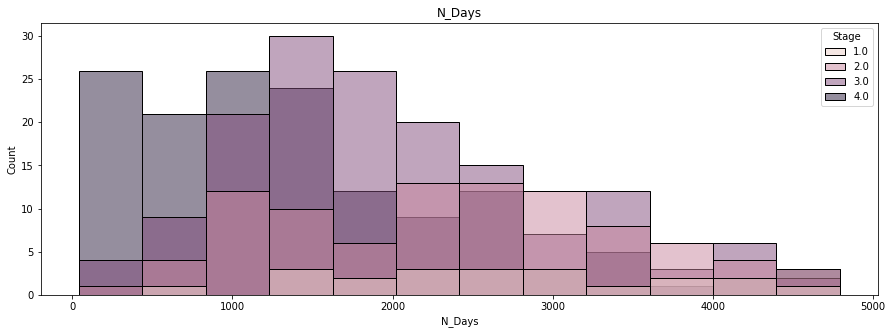

In [ ]:
plt.figure(figsize=(15,5))
sns.histplot(x="N_Days",data=df,hue="Stage")
plt.title("N_Days",fontsize=12)

In [ ]:
df["Sex"].value_counts()

F    368
M     44
Name: Sex, dtype: int64

Text(0.5, 1.0, 'Gender')

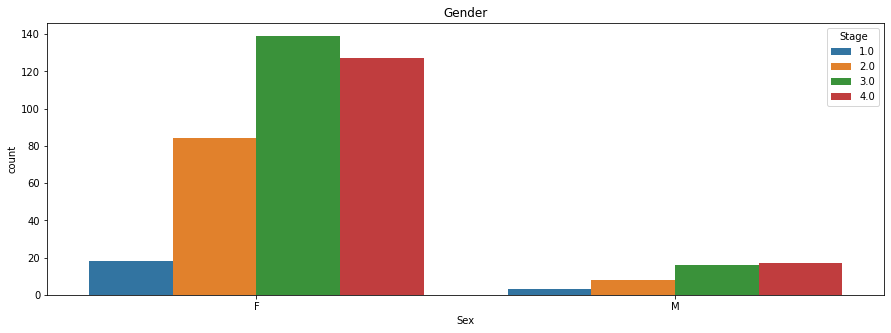

In [ ]:
plt.figure(figsize=(15,5))
sns.histplot(x="Sex",data=df,hue="Stage")
plt.title("Gender",fontsize=12)

In [ ]:
df["Drug"].value_counts()

D-penicillamine    258
Placebo            154
Name: Drug, dtype: int64

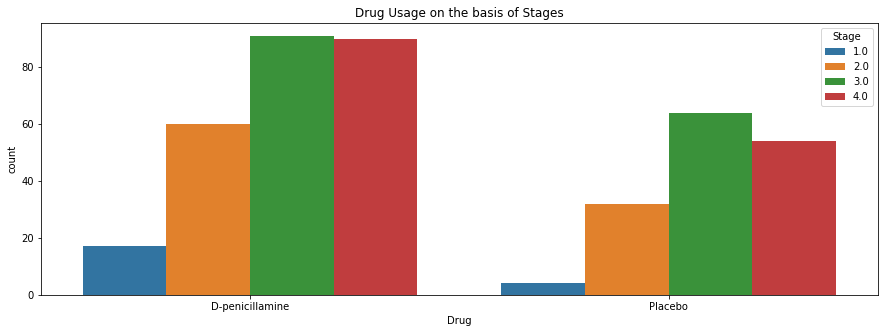

In [ ]:
plt.figure(figsize=(15,5))
sns.countplot(x="Drug", data=df , hue="Stage")
plt.title("Drug Usage on the basis of Stages",fontsize=12)
plt.show()

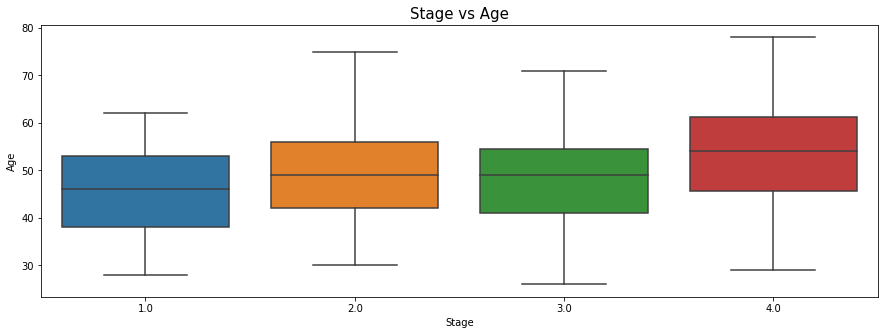

In [ ]:
plt.figure(figsize=(15,5))
sns.boxplot(x=df["Stage"],y=df["Age"])
plt.title("Stage vs Age", size=15)
plt.show()

In [ ]:
df["Ascites"].value_counts()

N    388
Y     24
Name: Ascites, dtype: int64

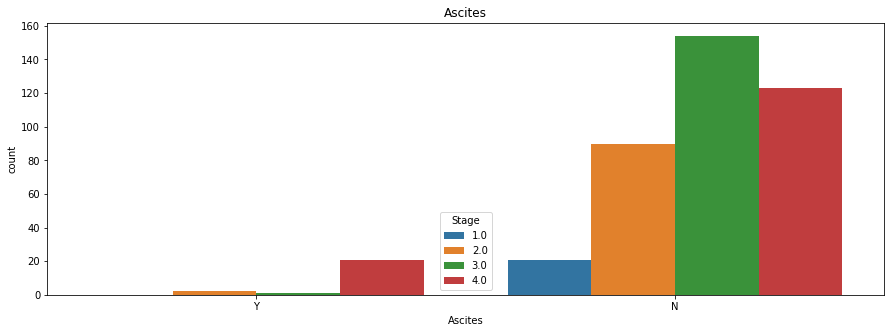

In [ ]:
plt.figure(figsize=(15,5))
sns.countplot(x="Ascites",data=df,hue="Stage")
plt.title("Ascites", fontsize=12)
plt.show()

In [ ]:
df.columns

Index(['ID', 'N_Days', 'Status', 'Drug', 'Age', 'Sex', 'Ascites',
       'Hepatomegaly', 'Spiders', 'Edema', 'Bilirubin', 'Cholesterol',
       'Albumin', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets',
       'Prothrombin', 'Stage'],
      dtype='object')

In [ ]:
df["Hepatomegaly"].value_counts()

Y    260
N    152
Name: Hepatomegaly, dtype: int64

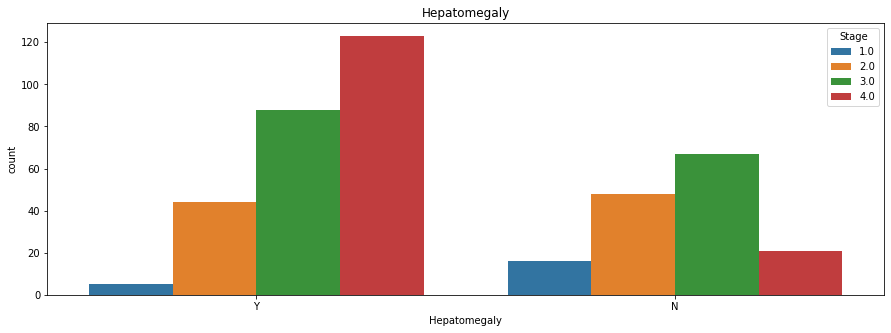

In [ ]:
plt.figure(figsize=(15,5))
sns.countplot(x="Hepatomegaly",data=df,hue="Stage")
plt.title("Hepatomegaly",fontsize=12)
plt.show()

In [ ]:
df["Spiders"].value_counts()

N    322
Y     90
Name: Spiders, dtype: int64

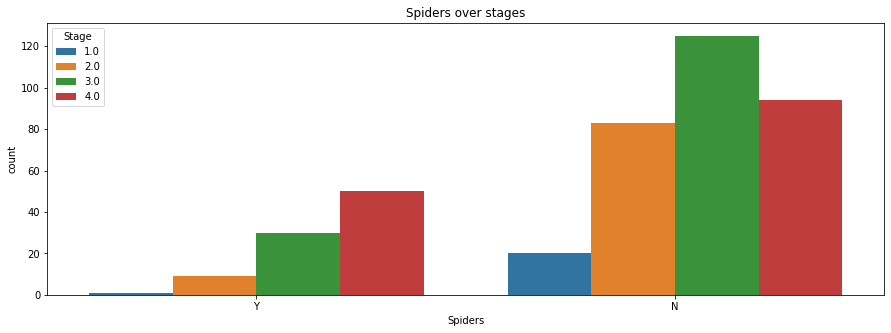

In [ ]:
plt.figure(figsize=(15,5))
sns.countplot(x="Spiders",data=df,hue="Stage")
plt.title("Spiders over stages", fontsize=12)
plt.show()

In [ ]:
df["Edema"].value_counts()

N    348
S     44
Y     20
Name: Edema, dtype: int64

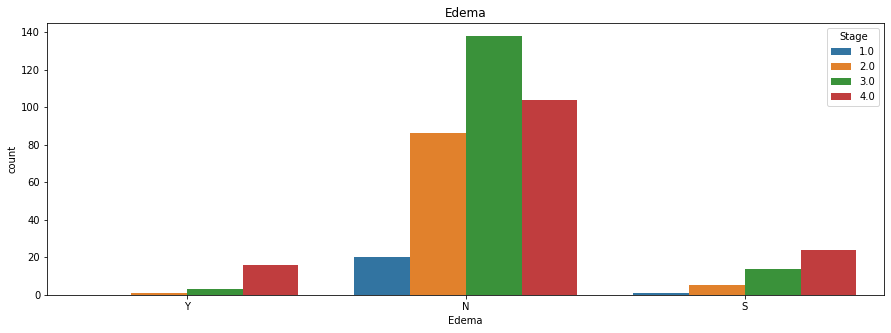

In [ ]:
plt.figure(figsize=(15,5))
sns.countplot(x="Edema", data=df ,hue="Stage")
plt.title("Edema", fontsize=12)
plt.show()

In [ ]:
df["Bilirubin"].value_counts()

0.7     32
0.6     31
0.5     23
0.8     22
1.1     19
        ..
24.5     1
10.8     1
3.7      1
5.9      1
4.6      1
Name: Bilirubin, Length: 98, dtype: int64

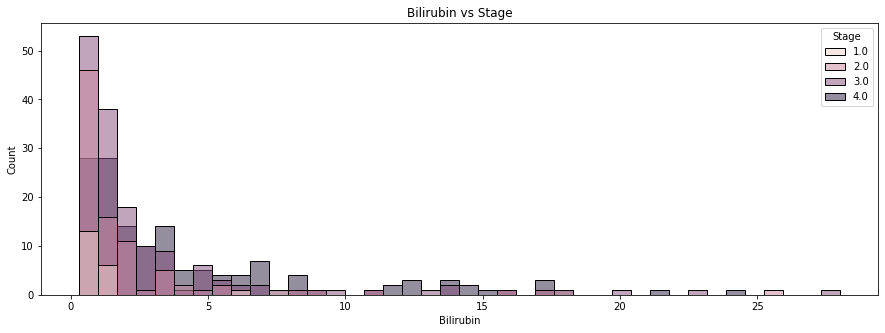

In [ ]:
plt.figure(figsize=(15,5))
sns.histplot(x="Bilirubin",data=df,hue="Stage")
plt.title("Bilirubin vs Stage", fontsize=12)
plt.show()

In [ ]:
df['Cholesterol'].value_counts()

309.5    128
260.0      4
316.0      4
448.0      4
257.0      3
        ... 
486.0      1
528.0      1
458.0      1
950.0      1
576.0      1
Name: Cholesterol, Length: 202, dtype: int64

In [ ]:
plt.figure(figsize=(15,5))
sns.histplot(x="Cholesterol", data=df, hue="Stage")
plt.title("Cholesterol vs Stage", fontsize=12)
plt.show()

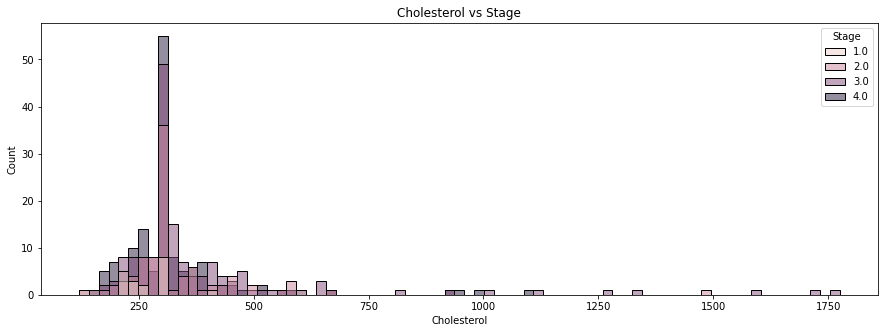

In [ ]:
plt.figure(figsize=(15,5))
sns.histplot(x="Cholesterol", data=df, hue="Stage")
plt.title("Cholesterol vs Stage", fontsize=12)
plt.show()

In [ ]:
df["Albumin"].value_counts()

3.35    11
3.60     8
3.50     8
3.70     7
3.40     7
        ..
3.38     1
2.43     1
3.05     1
1.96     1
3.17     1
Name: Albumin, Length: 153, dtype: int64

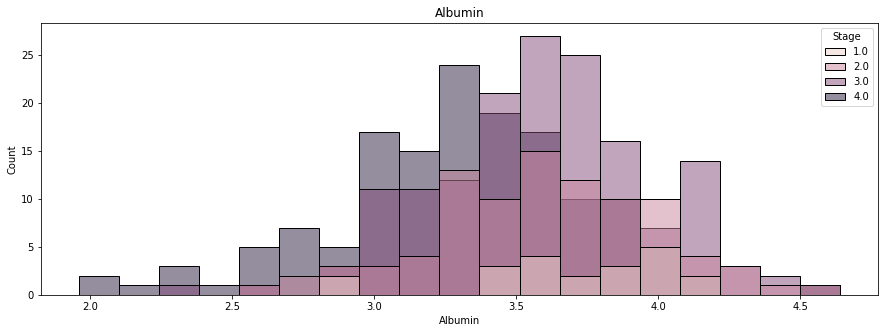

In [ ]:
plt.figure(figsize=(15,5))
sns.histplot(x="Albumin", data=df, hue="Stage")
plt.title("Albumin",fontsize=12)
plt.show()

In [ ]:
df['Copper'].value_counts()

73.0     107
52.0       8
67.0       7
58.0       6
75.0       6
        ... 
178.0      1
110.0      1
154.0      1
269.0      1
186.0      1
Name: Copper, Length: 158, dtype: int64

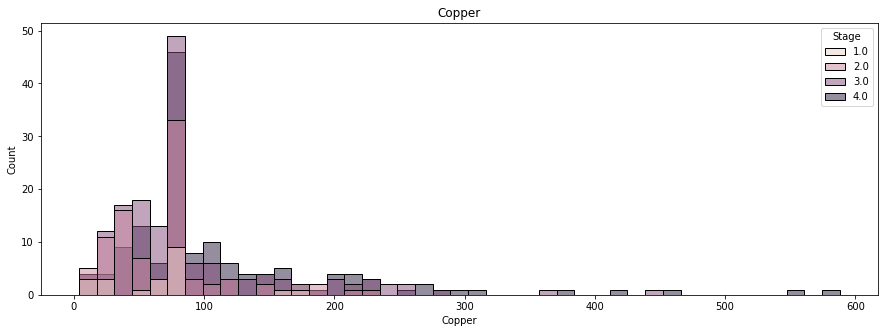

In [ ]:
plt.figure(figsize=(15,5))
sns.histplot(x="Copper", data=df, hue="Stage")
plt.title("Copper", fontsize=12)
plt.show()

In [ ]:
df.corr()["Stage"].abs().sort_values(ascending=False)

Stage            1.000000
N_Days           0.366193
Albumin          0.305296
Platelets        0.247242
Copper           0.232154
Prothrombin      0.206522
Bilirubin        0.200731
Age              0.186581
SGOT             0.143536
Tryglicerides    0.099828
Alk_Phos         0.037813
ID               0.033757
Cholesterol      0.009849
Name: Stage, dtype: float64

ID tryglicerides and alk_phos SGOT and cholestrol are weakly correlated

Text(0.5, 1.0, 'Age vs cholesterol')

<Figure size 1080x360 with 0 Axes>

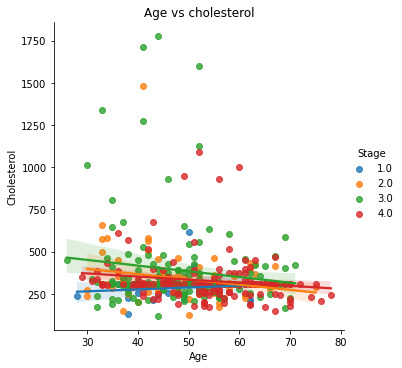

In [ ]:
plt.figure(figsize=(15,5))
sns.lmplot(x="Age", y="Cholesterol", hue="Stage", data=df)
plt.title("Age vs cholesterol")

age vs platelets, alk_phos, triglycerides,prothrombin, sgot
cholestrol

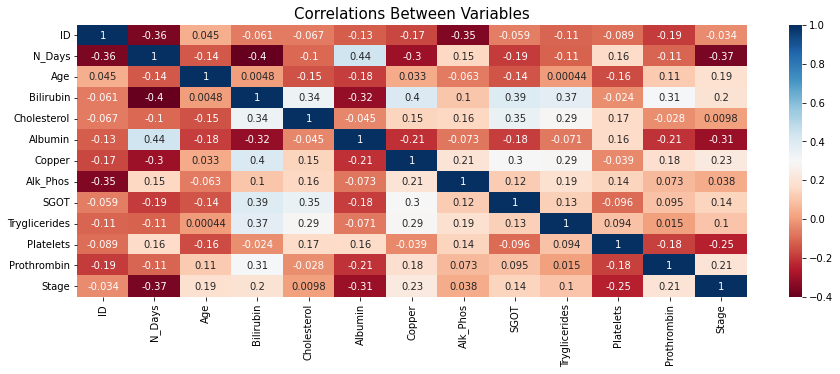

In [ ]:
plt.figure(figsize=(15,5))
sns.heatmap(df.corr(),annot=True, cmap="RdBu")
plt.title("Correlations Between Variables", size=15)
plt.show()

converting categorical valueas to  numerical values

In [ ]:
colum_cat=['Status','Drug','Sex','Ascites','Hepatomegaly','Spiders','Edema']
for i in colum_cat:
  print('-----------------------------')
  print(df[i].value_counts())
  print('-----------------------------')

-----------------------------
C     230
D     157
CL     25
Name: Status, dtype: int64
-----------------------------
-----------------------------
D-penicillamine    258
Placebo            154
Name: Drug, dtype: int64
-----------------------------
-----------------------------
F    368
M     44
Name: Sex, dtype: int64
-----------------------------
-----------------------------
N    388
Y     24
Name: Ascites, dtype: int64
-----------------------------
-----------------------------
Y    260
N    152
Name: Hepatomegaly, dtype: int64
-----------------------------
-----------------------------
N    322
Y     90
Name: Spiders, dtype: int64
-----------------------------
-----------------------------
N    348
S     44
Y     20
Name: Edema, dtype: int64
-----------------------------


In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

cols_cat=['Status','Drug','Sex','Ascites','Hepatomegaly','Spiders','Edema']
for col in cols_cat:
  df[col]=le.fit_transform(df[col])
  print(le.classes_)

['C' 'CL' 'D']
['D-penicillamine' 'Placebo']
['F' 'M']
['N' 'Y']
['N' 'Y']
['N' 'Y']
['N' 'S' 'Y']


Detect outliers

In [ ]:
from sklearn.neighbors import LocalOutlierFactor
clf = LocalOutlierFactor()
y_pred = clf.fit_predict(df)
y_pred

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1, -1,  1,  1,  1, -1,  1,  1, -1,  1,  1,  1,  1,
        1,  1, -1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1, -1,
        1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,
       -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1

In [ ]:
x_score=clf.negative_outlier_factor_
outlier_score=pd.DataFrame()
outlier_score["score"]=x_score

#threshold
threshold2 =-1.5
filtre2 = outlier_score["score"]<threshold2
outlier_index = outlier_score[filtre2].index.tolist()

In [ ]:
len(outlier_index)

13

imbalanced data

In [ ]:
df['Stage'] = np.where(df['Stage'] == 4,1,0)